<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,2.571581,203.195274,201.489334,1.705940
1,0.0,1.0,57.329540,67.934475,53.739469,7.861053,196.864537,187.884587,8.979949
2,0.0,2.0,45.215694,51.000161,43.520343,1.023569,150.759767,151.158478,-0.398711
3,0.0,3.0,69.375325,41.455180,64.082408,-13.969907,170.943005,186.257432,-15.314427
4,0.0,4.0,87.837297,72.508079,90.676124,-1.833966,259.187535,257.508580,1.678955
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,8.874531,220.947965,212.459015,8.488950
19996,999.0,16.0,62.971081,59.155436,22.434296,9.940375,164.501188,153.925880,10.575308
19997,999.0,17.0,37.323768,53.799677,46.207262,0.324111,147.654819,146.918284,0.736535
19998,999.0,18.0,42.204721,36.635143,97.635290,1.276855,187.752009,185.866816,1.885193


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,2.571581,203.195274,201.489334,1.705940
1,0.0,1.0,57.329540,67.934475,53.739469,7.861053,196.864537,187.884587,8.979949
2,0.0,2.0,45.215694,51.000161,43.520343,1.023569,150.759767,151.158478,-0.398711
3,0.0,3.0,69.375325,41.455180,64.082408,-13.969907,170.943005,186.257432,-15.314427
4,0.0,4.0,87.837297,72.508079,90.676124,-1.833966,259.187535,257.508580,1.678955
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,8.874531,220.947965,212.459015,8.488950
19996,999.0,16.0,62.971081,59.155436,22.434296,9.940375,164.501188,153.925880,10.575308
19997,999.0,17.0,37.323768,53.799677,46.207262,0.324111,147.654819,146.918284,0.736535
19998,999.0,18.0,42.204721,36.635143,97.635290,1.276855,187.752009,185.866816,1.885193


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  203.195274  201.489334   1.705940
      1.0    57.329540  67.934475  53.739469  ...  196.864537  187.884587   8.979949
      2.0    45.215694  51.000161  43.520343  ...  150.759767  151.158478  -0.398711
      3.0    69.375325  41.455180  64.082408  ...  170.943005  186.257432 -15.314427
      4.0    87.837297  72.508079  90.676124  ...  259.187535  257.508580   1.678955
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  220.947965  212.459015   8.488950
      16.0   62.971081  59.155436  22.434296  ...  164.501188  153.925880  10.575308
      17.0   37.323768  53.799677  46.207262  ...  147.654819  146.918284   0.736535
      18.0   42.204721  36.635143  97.635290  ...  187.752009  185.866816   1.885193
      19.0   88.522268  25.681428  82.018999  ...  202.490246  204.725277  -2.235031

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  203.195274  201.489334   1.705940
      1.0    57.329540  67.934475  53.739469  ...  196.864537  187.884587   8.979949
      2.0    45.215694  51.000161  43.520343  ...  150.759767  151.158478  -0.398711
      3.0    69.375325  41.455180  64.082408  ...  170.943005  186.257432 -15.314427
      4.0    87.837297  72.508079  90.676124  ...  259.187535  257.508580   1.678955
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  220.947965  212.459015   8.488950
      16.0   62.971081  59.155436  22.434296  ...  164.501188  153.925880  10.575308
      17.0   37.323768  53.799677  46.207262  ...  147.654819  146.918284   0.736535
      18.0   42.204721  36.635143  97.635290  ...  187.752009  185.866816   1.885193
      19.0   88.522268  25.681428  82.018999  ...  202.490246  204.725277  -2.235031

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,2.571581,203.195274,201.489334,1.705940
1,0.0,1.0,57.329540,67.934475,53.739469,7.861053,196.864537,187.884587,8.979949
2,0.0,2.0,45.215694,51.000161,43.520343,1.023569,150.759767,151.158478,-0.398711
3,0.0,3.0,69.375325,41.455180,64.082408,-13.969907,170.943005,186.257432,-15.314427
4,0.0,4.0,87.837297,72.508079,90.676124,-1.833966,259.187535,257.508580,1.678955
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,8.874531,220.947965,212.459015,8.488950
19996,999.0,16.0,62.971081,59.155436,22.434296,9.940375,164.501188,153.925880,10.575308
19997,999.0,17.0,37.323768,53.799677,46.207262,0.324111,147.654819,146.918284,0.736535
19998,999.0,18.0,42.204721,36.635143,97.635290,1.276855,187.752009,185.866816,1.885193


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  203.195274  201.489334   1.705940
      1.0    57.329540  67.934475  53.739469  ...  196.864537  187.884587   8.979949
      2.0    45.215694  51.000161  43.520343  ...  150.759767  151.158478  -0.398711
      3.0    69.375325  41.455180  64.082408  ...  170.943005  186.257432 -15.314427
      4.0    87.837297  72.508079  90.676124  ...  259.187535  257.508580   1.678955
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  220.947965  212.459015   8.488950
      16.0   62.971081  59.155436  22.434296  ...  164.501188  153.925880  10.575308
      17.0   37.323768  53.799677  46.207262  ...  147.654819  146.918284   0.736535
      18.0   42.204721  36.635143  97.635290  ...  187.752009  185.866816   1.885193
      19.0   88.522268  25.681428  82.018999  ...  202.490246  204.725277  -2.235031

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

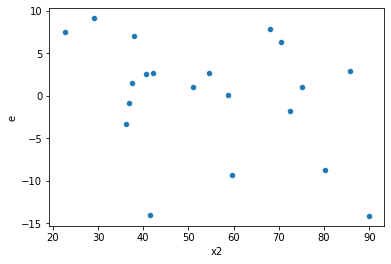

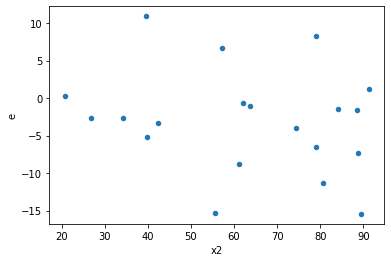

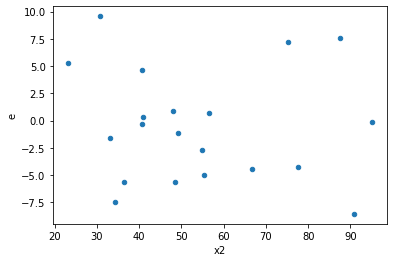

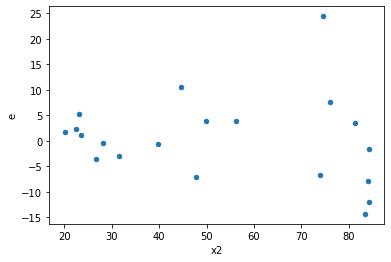

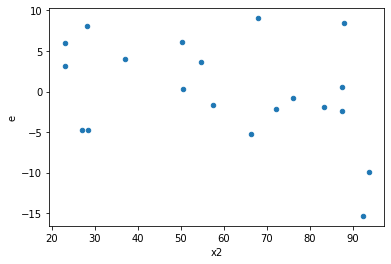

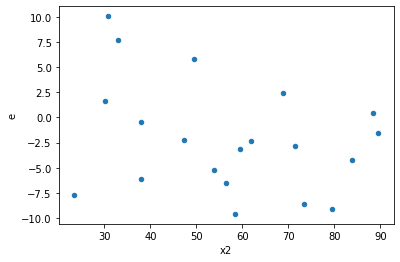

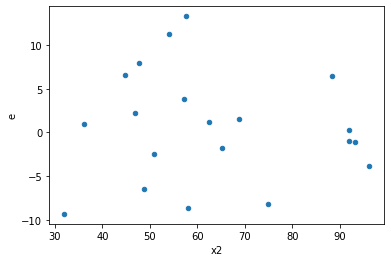

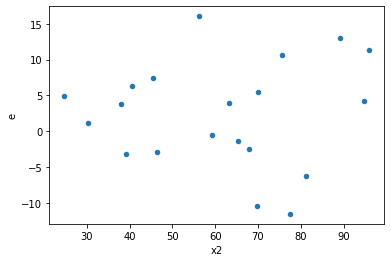

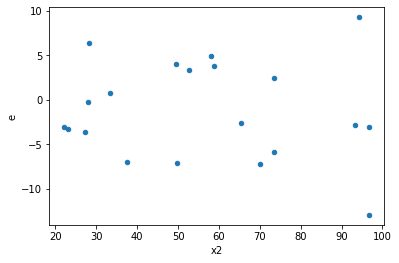

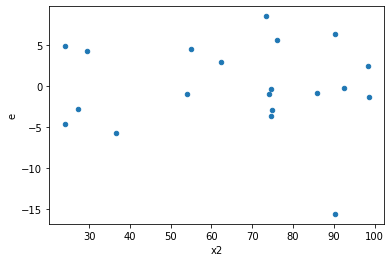

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,364.1426138587135,220.87201301394242,91.03565346467838,55.218003253485605,1.6486589173963258,0.5965981636512367,0.7017009181743816,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,258.91826642470926,222.9302928866358,64.72956660617731,55.73257322165895,1.1614315088007083,0.8735602239265248,0.5632198880367376,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,636.9404114525,25.021420065086755,159.235102863125,6.255355016271689,25.455805857367977,0.0028967250178328907,0.9985516374910836,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,263.2400141929149,147.3441505133618,65.81000354822872,36.83603762834045,1.7865657596569682,0.5396625128277077,0.7301687435861461,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,267.53965549816155,193.574923857627,66.88491387454039,48.39373096440675,1.3820987252198795,0.7311789614304465,0.6344105192847768,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,261.1348895867294,81.65774552260602,65.28372239668235,20.414436380651505,3.197919412487786,0.2277955281596371,0.8861022359201814,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,252.9032518752378,19.778239894070968,63.22581296880945,4.944559973517742,12.786944299884441,0.01421496376686382,0.9928925181165681,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,104.1838647819148,83.30020359633218,26.0459661954787,20.825050899083045,1.2507036031602468,0.8120711180713571,0.5939644409643214,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,312.4603916878666,80.81806223248802,78.11509792196665,20.204515558122004,3.8662197911775817,0.16408291901219085,0.9179585404939046,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,364.1426138587135,220.87201301394242,91.03565346467838,55.218003253485605,1.6486589173963258,1.4034018363487633,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,258.91826642470926,222.9302928866358,64.72956660617731,55.73257322165895,1.1614315088007083,1.1264397760734752,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,165.93800503798954,190.73375479129407,41.484501259497385,47.68343869782352,0.8699981040039991,0.882264510135721,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,636.9404114525,25.021420065086755,159.235102863125,6.255355016271689,25.455805857367977,0.0028967250178328907,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,263.2400141929149,147.3441505133618,65.81000354822872,36.83603762834045,1.7865657596569682,1.4603374871722923,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,70.17830839144597,194.05310285293666,17.54457709786149,48.513275713234165,0.361644866068597,0.28861726035786645,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,56.9377686020756,123.827239097643,14.2344421505189,30.95680977441075,0.4598161843629395,0.4139178526104797,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,267.53965549816155,193.574923857627,66.88491387454039,48.39373096440675,1.3820987252198795,1.2688210385695535,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,261.1348895867294,81.65774552260602,65.28372239668235,20.414436380651505,3.197919412487786,0.2277955281596371,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64